In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\BSB\AppData\Local\Temp\ipykernel_12460\2212201683.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


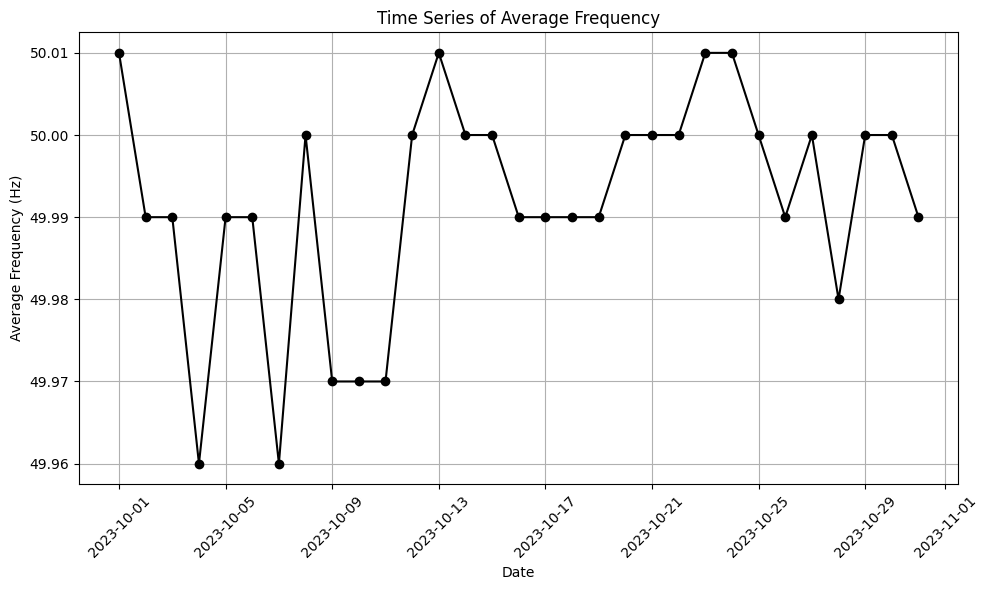

<Figure size 1000x600 with 0 Axes>

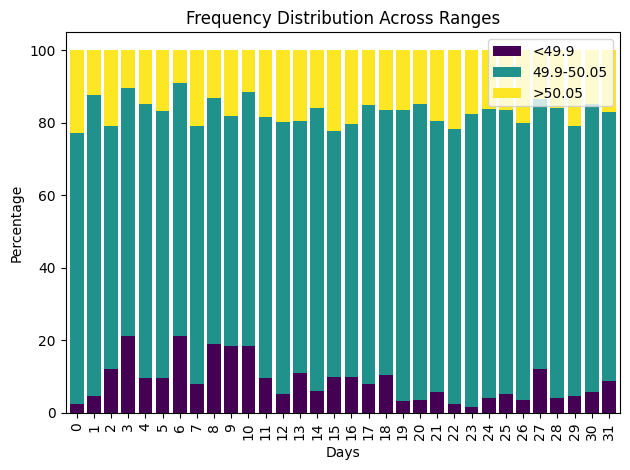

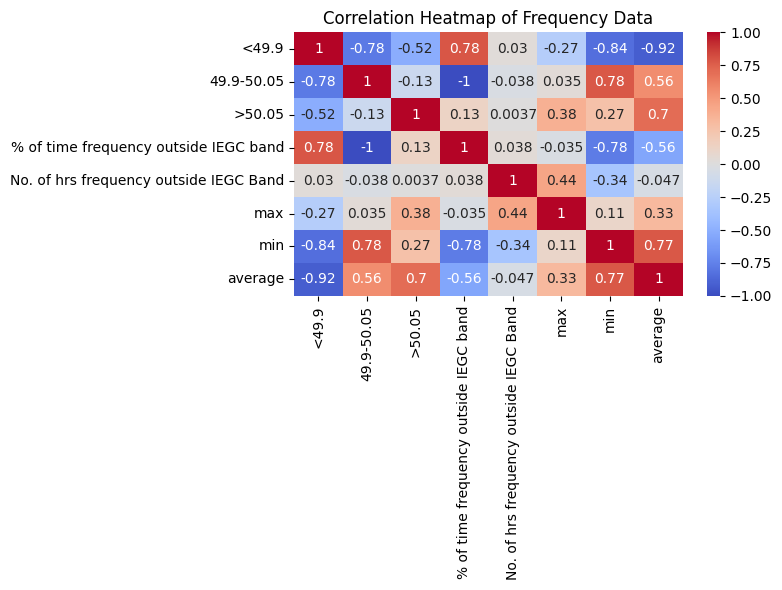

In [12]:
#loading and cleaning data
df = pd.read_csv(r"C:\Users\BSB\Downloads\frequency_data_manual.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Time Series of Average Frequency
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['average'], marker='o', linestyle='-', color='black')
plt.title('Time Series of Average Frequency')
plt.xlabel('Date')
plt.ylabel('Average Frequency (Hz)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of Frequency Ranges
plt.figure(figsize=(10, 6))
df[['<49.9', '49.9-50.05', '>50.05']].plot(kind='bar', stacked=True, width=0.8, colormap='viridis')
plt.title('Frequency Distribution Across Ranges')
plt.xlabel('Days')
plt.ylabel('Percentage')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Frequency Data')
plt.tight_layout()
plt.show()


Correlation between average value and % of time frequency less than 49.9 clearly shows that frequency whenever deviates it's usually lesser than 49.9 Hz.

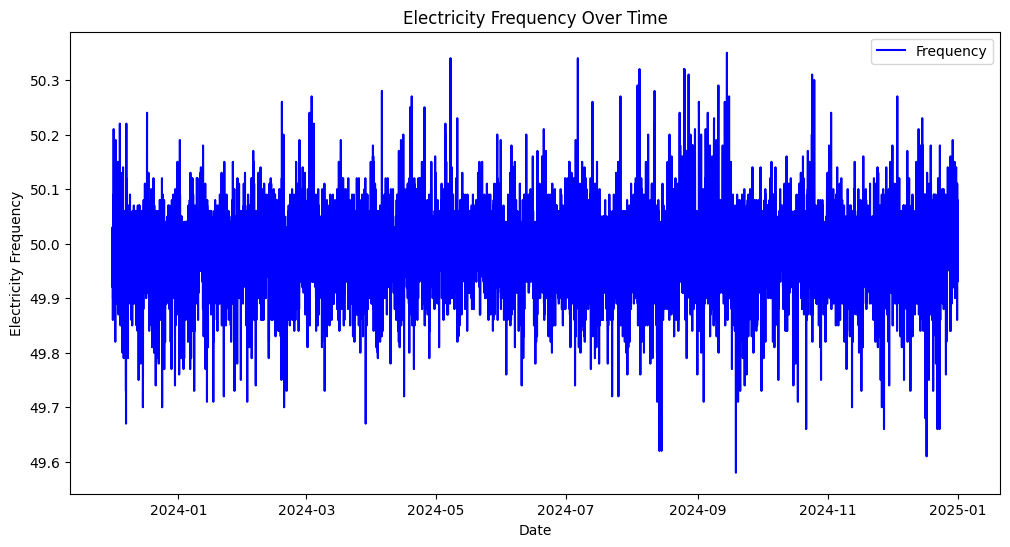

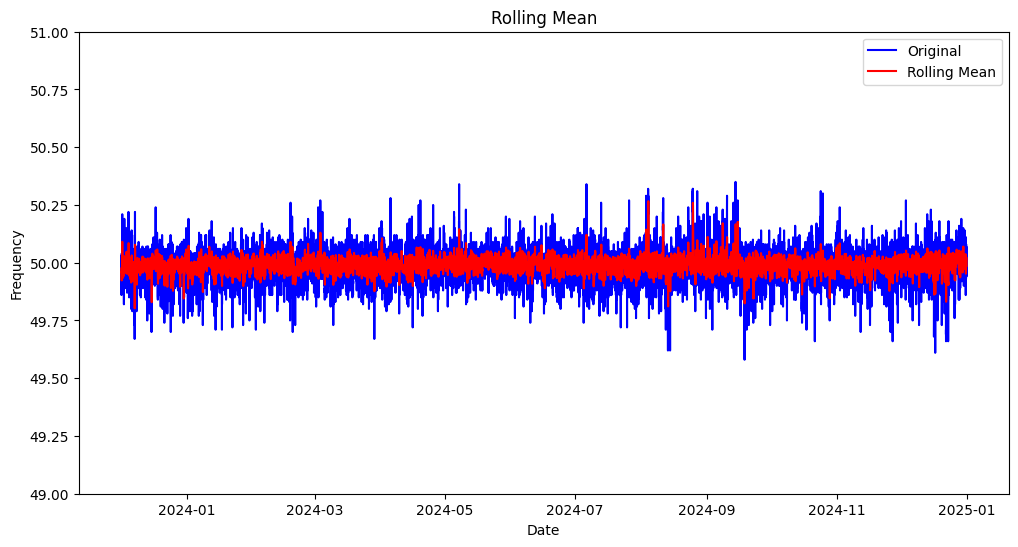

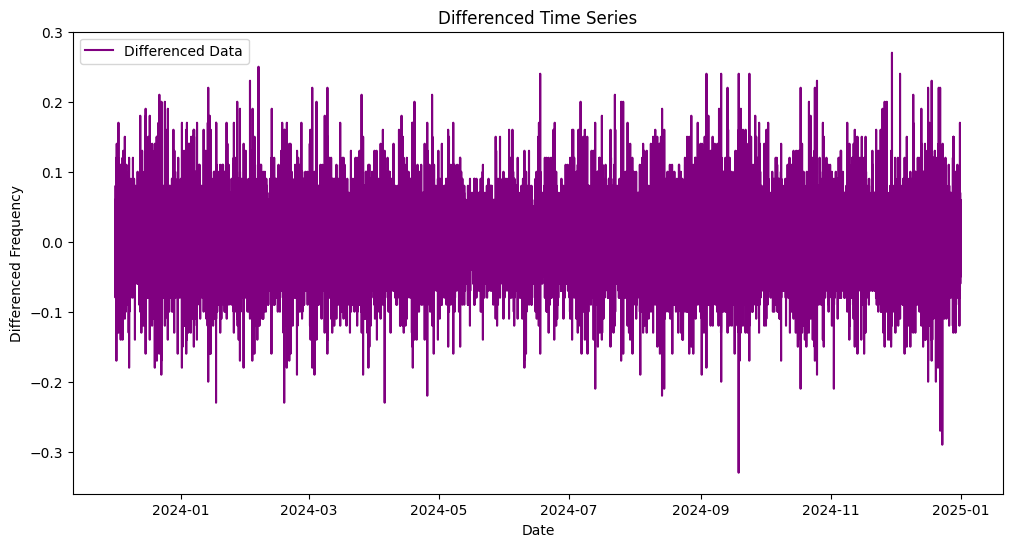

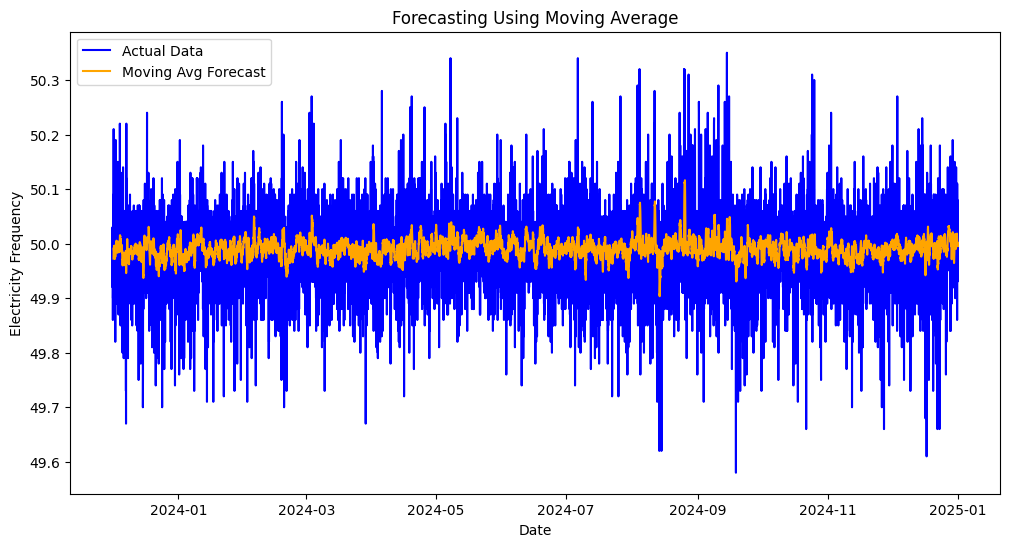

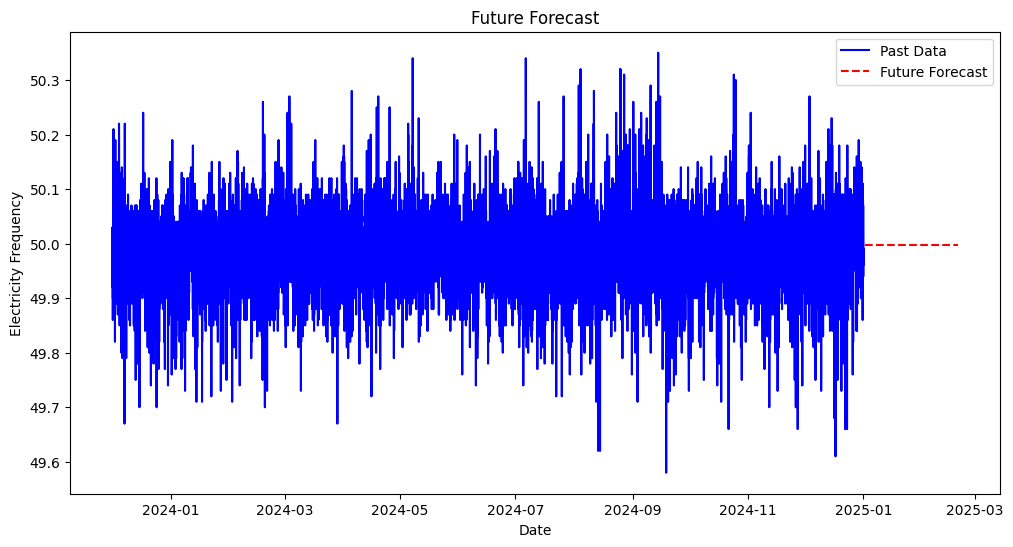

In [ ]:
df = pd.read_csv(r"C:\Users\BSB\Downloads\cleaned_combined.csv")
df['DateTime'] = pd.to_datetime(df['DateTime'], dayfirst=True)

# Set the 'Date' column as the index
df.set_index('DateTime', inplace=True)

# Ensure the data is sorted by date
df.sort_index(inplace=True)

# Plot Original Data (Matplotlib for speed)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Value"], label="Frequency", color="blue")
plt.xlabel("Date")
plt.ylabel("Electricity Frequency")
plt.title("Electricity Frequency Over Time")
plt.legend()
plt.show()
    
# Stationarity Check (Rolling Mean & Std)
rolling_window = 12  # Smaller window for speed
df["rolling_mean"] = df["Value"].rolling(window=rolling_window).mean()
#df["rolling_std"] = df["Value"].rolling(window=rolling_window).std()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Value"], label="Original", color="blue")
plt.plot(df.index, df["rolling_mean"], label="Rolling Mean", color="red")
#plt.plot(df.index, df["rolling_std"], label="Rolling Std Dev", color="green")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.ylim(49, 51)
plt.title("Rolling Mean")
plt.legend()
plt.show()

# Differencing for Stationarity
df["frequency_diff"] = df["Value"].diff()

plt.figure(figsize=(12, 6))
plt.plot(df.index[1:], df["frequency_diff"].dropna(), label="Differenced Data", color="purple")
plt.xlabel("Date")
plt.ylabel("Differenced Frequency")
plt.title("Differenced Time Series")
plt.legend()
plt.show()

# Moving Average Forecast (Faster than ARIMA)
moving_avg_window = 50  # Smaller window for performance
df["moving_avg_forecast"] = df["Value"].rolling(window=moving_avg_window).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Value"], label="Actual Data", color="blue")
plt.plot(df.index, df["moving_avg_forecast"], label="Moving Avg Forecast", color="orange")
plt.xlabel("Date")
plt.ylabel("Electricity Frequency")
plt.title("Forecasting Using Moving Average")
plt.legend()
plt.show()

# Simple Future Forecast (Last Known Moving Avg)
future_steps = 50
last_known_value = df["moving_avg_forecast"].dropna().iloc[-1]
future_forecast = np.full(future_steps, last_known_value)
future_dates = pd.date_range(df.index[-1], periods=future_steps+1, freq="D")[1:]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Value"], label="Past Data", color="blue")
plt.plot(future_dates, future_forecast, label="Future Forecast", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Electricity Frequency")
plt.title("Future Forecast")
plt.legend()
plt.show()

ADF Statistic: -22.222623782633832
p-value: 0.0
Critical Values: {'1%': np.float64(-3.4305218406897566), '5%': np.float64(-2.861615949530489), '10%': np.float64(-2.566810425514632)}
 Series is Stationary


<Figure size 1000x500 with 0 Axes>

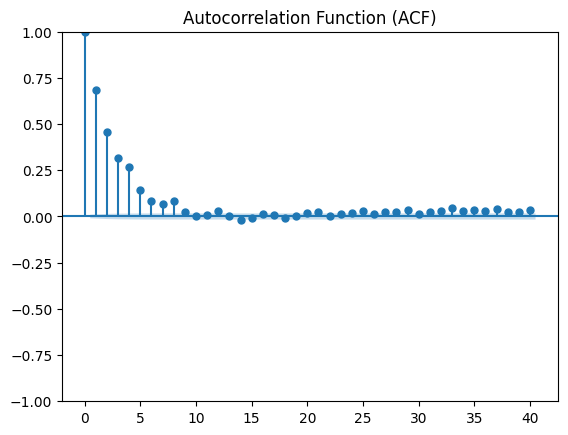

<Figure size 1000x500 with 0 Axes>

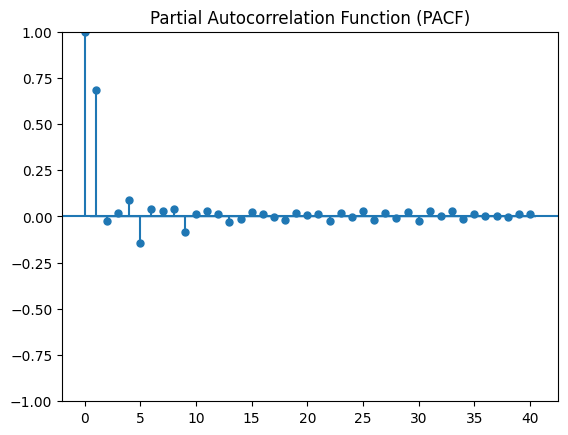

C:\Users\BSB\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\Users\BSB\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\Users\BSB\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\Users\BSB\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\Loca

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                38112
Model:                 ARIMA(5, 0, 2)   Log Likelihood               71886.440
Date:                Fri, 14 Feb 2025   AIC                        -143754.880
Time:                        15:41:28   BIC                        -143677.946
Sample:                    12-01-2023   HQIC                       -143730.473
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9908      0.001   8.37e+04      0.000      49.990      49.992
ar.L1          0.4316      0.044      9.763      0.000       0.345       0.518
ar.L2          0.0600      0.022      2.783      0.0

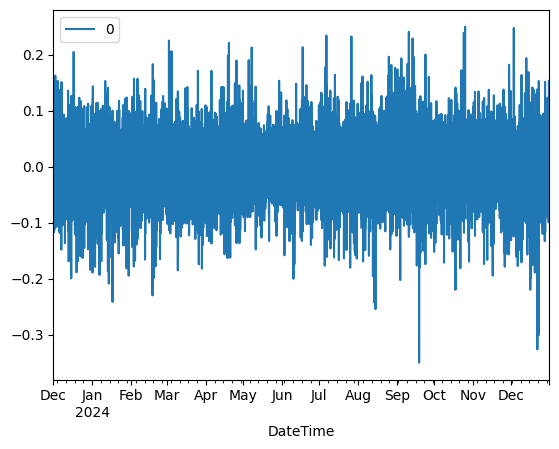

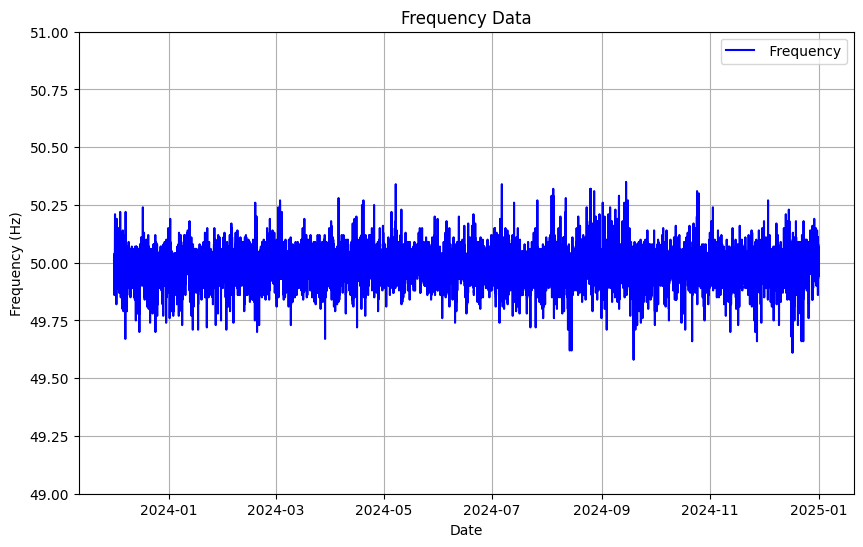

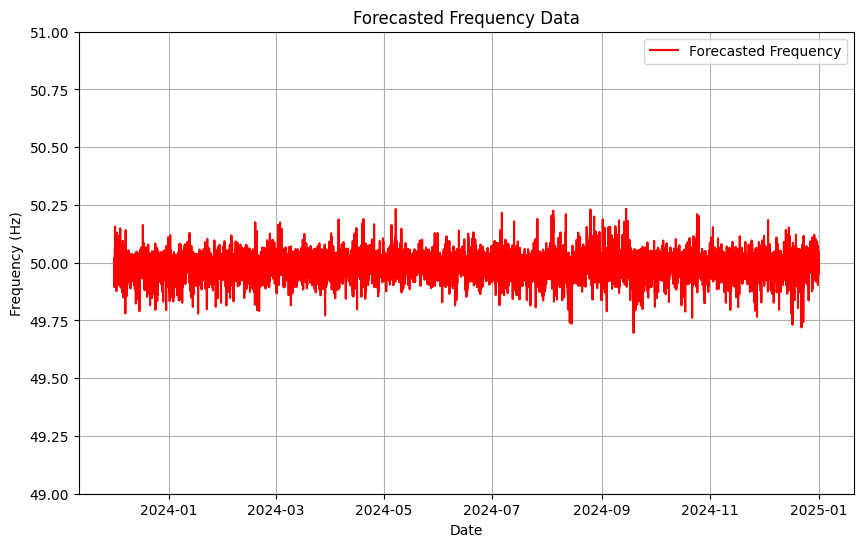

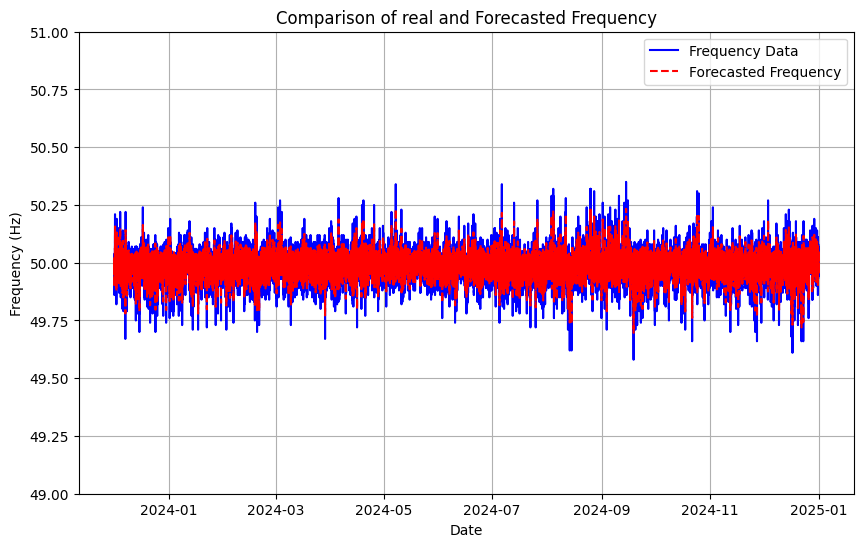

Mean Squared Error: 0.0013464687900906296


In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv(r"C:\Users\BSB\Downloads\cleaned_combined.csv")
#df = df.iloc[-1000:] 

# Convert 'Date' to datetime format if not already
df['DateTime'] = pd.to_datetime(df['DateTime'], dayfirst=True)

# Set the 'Date' column as the index
df.set_index('DateTime', inplace=True)

# Ensure the data is sorted by date
df.sort_index(inplace=True)
series = df['Value']

#ADFTest
result = adfuller(df['Value'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print(" Series is Stationary")
else:
    print(" Series is Non-Stationary")

# Plot ACF and PACF to get initial insights
plt.figure(figsize=(10, 5))
plot_acf(series, lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(10, 5))
plot_pacf(series, lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

model = ARIMA(series, order=(5, 0, 2))
model_fit = model.fit()
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

# Print residual statistics
print(residuals.describe())
# Forecast the entire series from start to end
forecast = model_fit.predict(start=series.index[0], end=series.index[-1])

plt.figure(figsize=(10, 6))
plt.plot(series.index, series, color='blue', label=' Frequency')
plt.title('Frequency Data')
plt.xlabel('Date')
plt.ylabel('Frequency (Hz)')
plt.ylim(49, 51)
plt.legend()
plt.grid(True)
plt.show()

# Plot forecasted data
plt.figure(figsize=(10, 6))
plt.plot(forecast.index, forecast, color='red', label='Forecasted Frequency')
plt.title('Forecasted Frequency Data')
plt.xlabel('Date')
plt.ylabel('Frequency (Hz)')
plt.ylim(49, 51)
plt.legend()
plt.grid(True)
plt.show()

# Compare both on the same graph
plt.figure(figsize=(10, 6))
plt.plot(series.index, series, color='blue', label='Frequency Data')
plt.plot(forecast.index, forecast, color='red', linestyle='--', label='Forecasted Frequency')
plt.title('Comparison of real and Forecasted Frequency')
plt.xlabel('Date')
plt.ylabel('Frequency (Hz)')
plt.ylim(49, 51)
plt.legend()
plt.grid(True)
plt.show()

# Compute mean squared error
mse = mean_squared_error(series, forecast)
print(f'Mean Squared Error: {mse}')
